**Import used libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
import imageio
import os
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator
import seaborn as sns
from scipy.optimize import curve_fit 

# **1. Linear function regression with normally distributed noisy data**




In [ ]:
x = np.array(range(0, 500, 1))
a = 1
b = 20
y = a*x + b

plt.figure(figsize=(20,10))
plt.plot(x, y, color = "r", linewidth = 3, label= "Prosta o równaniu y = x + 20")
plt.scatter(x,y, color= "b", label= "Dane pomiarowe")
plt.xlabel("Wartości X", fontsize=15.0)
plt.ylabel("Wartości Y", fontsize=15.0)
plt.title("Wykres funkcji liniowej y = x + 20", fontsize=20.0)
plt.legend(fontsize=15.0)

plt.show()

In [ ]:
x1 = np.array(range(0, 500, 1))
x2 = x1.reshape(-1,1)

a = 1
b = 20

y1 = (a*x2) + b # podstawowy model funkcji liniowej

# dla funkcji wielomianowej y = a*x1**2 + b*x1 + c, parametry a=0.1, b=1, c=20
# dla funkcji logarytmicznej y = np.log(a*x+b), parametry a=1, b=20
# dla funkcji log przekształconej eksponeną y1 = np.exp(y)

j = 0
j_list = []

a1_list = []
b1_list = []

a1_mean = []
b1_mean = []

a1_std = []
b1_std = []

r2_list = []
r2_mean = []

for indeks in range(100):
  j_list.append(j)
  for i in range(100):
    noise = np.random.normal(0, j, 500) # zdefiniowanie szumu o rozkładzie normalnym
    noise2 = noise.reshape(500,1)
    y2 = y1 + noise2 # dodanie szumu do niezaszumionej funkcji 
    model = LinearRegression().fit(x2, y2) # zdefiniowanie i dopasowanie modelu regresji liniowej
    a1 = model.coef_ # wyznaczenie współczynnika przy x
    b1 = model.intercept_  # wyznaczenie wyrazu wolnego
    a1_list.append(float(a1[0]))
    b1_list.append(float(b1[0]))
    y3 = a1*x2 + b1
    r_sq = r2_score(y1, y3) # wyznaczenie średnich wartości współczynnika determinacji r kwadrat
    r2_list.append(r_sq)
    
    # plt.figure(figsize=(20,10))
    # plt.xlim([-50,620])
    # plt.ylim([-50,620])
    # plt.xlabel("Wartości X", fontsize = 15.0)
    # plt.ylabel("Wartości Y", fontsize = 15.0)
    # plt.text(-20,500,("Odchylenie standardowe: " + str(round(j, 1))), fontsize=15.0)
    # #plt.text(-20,500,("Odchylenie standardowe: 3"), fontsize=15.0)
    # plt.text(-20, 460,("Wartość oczekiwana: 0"), fontsize=15.0)
    # if b1[0] < 0:
    #   plt.text(-20,580, ("Równanie prostej: y = (" + str(a1[0][0]) + ")x " + str(b1[0])), fontsize=15.0)
    # else:
    #   plt.text(-20,580, ("Równanie prostej: y = (" + str(a1[0][0]) + ")x + " + str(b1[0])), fontsize=15.0)

    # plt.text(-20,540, ("Współczynnik determinacji r kwadrat: " + str(r_sq)), fontsize=15.0)
    # plt.scatter(x2, y2, color = "blue", label = "Zaszumione dane pomiarowe")
    # plt.plot(x2, y3, color = "red", linewidth = 3, label= "Regresja liniowa")
    # plt.legend(fontsize=15.0, loc=4, prop={'size': 15})
    # plt.title("Model regresji liniowej z Gaussowskim rozkładem szumu", fontsize=20.0)
  
    
    # if i < 10:
    #   plt.savefig('images2/OPSI{0}.jpg'.format(i))
    # else:
    #   plt.savefig('images2/OPSI_{0}.jpg'.format(i))
    
    # plt.show()
   
  j += 0.1
  mean_a = np.mean(a1_list)
  a1_mean.append(mean_a)

  mean_b = np.mean(b1_list)
  b1_mean.append(mean_b)

  std_a = np.std(a1_list)
  a1_std.append(std_a)

  std_b = np.std(b1_list)  
  b1_std.append(std_b) 

  mean_r2 = np.mean(r2_list)
  r2_mean.append(mean_r2)

In [ ]:
sns.distplot(noise, bins=40, hist_kws={'edgecolor':'black'})

**Save charts and create animations**

In [ ]:
folder = '/content/images5'
files = [f"{folder}/{file}" for file in sorted(os.listdir(folder))]
photos = [imageio.imread(file) for file in files]
imageio.mimwrite('/content/images5/regression_055.mkv', photos, fps=7)

**Presentation of charts**

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, a1_mean, color="green", label="Średnia wartość parametru a")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość parametru a", fontsize=15.0)
plt.yticks(fontsize=13.0)
#plt.text(-3,0.999983,("Wartość minimalna średniej parametru a : " + str(min(a1_mean))), fontsize=12.0)
#plt.text(-3,0.999984,("Wartość maksymalna średniej parametru a : " + str(max(a1_mean))), fontsize=12.0)
plt.title("Wykres zależności odchylenia standardowego szumu i średniej wartości parametru a", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, b1_mean, color="blue", label="Średnia wartość parametru b")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość parametru b", fontsize=15.0)
plt.yticks(fontsize=13.0)
#plt.text(-3,20.0045,("Wartość minimalna średniej parametru b : " + str(min(b1_mean))), fontsize=12.0)
#plt.text(-3,20.005,("Wartość maksymalna średniej parametru b : " + str(max(b1_mean))), fontsize=12.0)
plt.title("Wykres zależności odchylenia standardowego szumu i średniej wartości parametru b", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, a1_std, color="red", label="Odchylenie standardowe parametru a")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Odchylenie standardowe parametru a", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu i odchylenia standardowego parametru a", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, b1_std, color="purple", label="Odchylenie standardowe parametru b")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Odchylenie standardowe parametru b", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu i odchylenia standardowego parametru b", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, r2_mean, color="cyan", label="Średnia wartość współczynnika determinacji r kwadrat")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość współczynnika determinacji r kwadrat", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu i średniej wartości współczynnika determinacji r kwadrat", fontsize=15.0)
plt.legend(fontsize=15.0)
plt.savefig("r2_mean.jpg")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(a1_list, b1_list, label = "Wartości parametrów modelu regresji", color="orange")
#plt.text(0.99, 19,("Wartość maksymalna parametru a : " + str(max(a1_list))), fontsize=12.0)
#plt.text(0.99,18.5,("Wartość minimalna parametru a : " + str(min(a1_list))), fontsize=12.0)
#plt.text(0.99,18,("Wartość maksymalna parametru b : " + str(max(b1_list))), fontsize=12.0)
#plt.text(0.99,17.5,("Wartość minimalna parametru b : " + str(min(b1_list))), fontsize=12.0)
plt.xlabel("Wartości parametru a", fontsize = 15.0)
plt.ylabel("Wartości parametru b", fontsize = 15.0)
plt.title("Rozkład wartości parametrów a i b", fontsize = 20.0)
plt.legend(loc=1, fontsize=15.0)

In [ ]:
%reset

## **2. Linear function regression with uniformly distributed noise data**

In [ ]:
x1 = np.array(range(0, 500, 1))
x2 = x1.reshape(-1,1)

a = 1
b = 20

y1 = (a*x2) + b

j = 1
a1_list = []
b1_list = []

a1_mean = []
b1_mean = []

a1_std = []
b1_std = []

r2_list = []
r2_mean = []

noise_std_list = []
j_list = []

    
for indeks in range(100):
  j_list.append(j)
  for i in range(100):
    noise = np.random.uniform(0, j, 500) # zdefiniowanie szumu o rozkładzie jednostajnym
    noise2 = noise.reshape(500,1)
    y2 = y1 + noise2  # dodanie szumu do niezaszumionej funkcji
    model = LinearRegression().fit(x2, y2)  # zdefiniowanie i dopasowanie modelu regresji liniowej
    a1 = model.coef_ # wyznaczenie współczynnika przy x
    b1 = model.intercept_ # wyznaczenie wyrazu wolnego
    a1_list.append(float(a1[0]))
    b1_list.append(float(b1[0]))
    y3 = a1*x2 + b1
    r_sq = r2_score(y1, y3) # wyznaczenie średnich wartości współczynnika determinacji r kwadrat
    r2_list.append(r_sq) 
    
    # plt.figure(figsize=(20,10))
    # plt.xlim([-50,620])
    # plt.ylim([-50,620])
    # plt.xlabel("Wartości X", fontsize = 15.0)
    # plt.ylabel("Wartości Y", fontsize = 15.0)
    # plt.text(-20,500,("Przedział wartości szumu o rozkładzie jednostajnym: (0, " + str(j) + ")"), fontsize=15.0)
    # plt.text(-20, 460,("Wartość minimalna szumu: 0"), fontsize=15.0)
    # if b1[0] < 0:
    #   plt.text(-20,580, ("Równanie prostej: y = (" + str(a1[0][0]) + ")x " + str(b1[0])), fontsize=15.0)
    # else:
    #   plt.text(-20,580, ("Równanie prostej: y = (" + str(a1[0][0]) + ")x + " + str(b1[0])), fontsize=15.0)

    # plt.text(-20,540, ("Współczynnik determinacji r kwadrat: " + str(r_sq)), fontsize=15.0)
    # plt.scatter(x2, y2, color = "blue", label = "Zaszumione dane pomiarowe")
    # plt.plot(x2, y3, color = "red", linewidth = 3, label= "Regresja liniowa")
    # plt.legend(fontsize=15.0, loc=4, prop={'size': 15})
    # plt.title("Model regresji liniowej z jednostajnym rozkładem szumu", fontsize=20.0)
      
    # if i < 10:
    #   plt.savefig('images3/OPSI{0}.jpg'.format(i))
    # else:
    #   plt.savefig('images3/OPSI_{0}.jpg'.format(i))
    
    # plt.show()
    
  j += 0.5

  noise_std = np.std(j_list)
  noise_std_list.append(noise_std)

  mean_a = np.mean(a1_list)
  a1_mean.append(mean_a)

  mean_b = np.mean(b1_list)
  b1_mean.append(mean_b)

  std_a = np.std(a1_list)
  a1_std.append(std_a)

  std_b = np.std(b1_list)  
  b1_std.append(std_b) 

  mean_r2 = np.mean(r2_list)
  r2_mean.append(mean_r2)




In [ ]:
sns.distplot(noise, bins=40, hist_kws={'edgecolor':'black'})

**Save charts and create animations**

In [ ]:
folder = '/content/images3'
files = [f"{folder}/{file}" for file in sorted(os.listdir(folder))]
photos = [imageio.imread(file) for file in files]
imageio.mimwrite('/content/images3/regression_uniform_2.mkv', photos, fps=7)

**Presentation of charts**

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(noise_std_list, a1_mean, color="green", label="Średnia wartość parametru a")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość parametru a", fontsize=15.0)
plt.yticks(fontsize=13.0)
#plt.text(-0.3,0.999972,("Wartość minimalna średniej parametru a : " + str(min(a1_mean))), fontsize=12.0)
#plt.text(-0.3,0.999975,("Wartość maksymalna średniej parametru a : " + str(max(a1_mean))), fontsize=12.0)
plt.title("Wykres zależności odchylenia standardowego szumu o rozkładzie jednostajnym i średniej wartości parametru a", fontsize=15.0)
plt.legend(fontsize=15.0)
plt.savefig("mean_a.jpg")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(noise_std_list, b1_mean, color="blue", label="Średnia wartość parametru b")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość parametru b", fontsize=15.0)
plt.yticks(fontsize=13.0)
#plt.text(0,30.5,("Wartość minimalna średniej parametru b : " + str(min(b1_mean))), fontsize=12.0)
#plt.text(0,31,("Wartość maksymalna średniej parametru b : " + str(max(b1_mean))), fontsize=12.0)
plt.title("Wykres zależności odchylenia standardowego szumu o rozkładzie jednostajnym i średniej wartości parametru b", fontsize=15.0)
plt.legend(fontsize=15.0)
plt.savefig("mean_b.jpg")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(noise_std_list, a1_std, color="red", label="Odchylenie standardowe parametru a")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Odchylenie standardowe parametru a", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu o rozkładzie jednostajnym i odchylenia standardowego parametru a", fontsize=15.0)
plt.legend(fontsize=15.0)
plt.savefig("std_a.jpg")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(noise_std_list, b1_std, color="purple", label="Odchylenie standardowe parametru b")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Odchylenie standardowe parametru b", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu o rozkładzie jednostajnym i odchylenia standardowego parametru b", fontsize=15.0)
plt.legend(fontsize=15.0)
plt.savefig("std_b.jpg")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(noise_std_list, r2_mean, color="cyan", label="Średnia wartość współczynnika determinacji r kwadrat")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość współczynnika determinacji r kwadrat", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu o rozkładzie jednostajnym i średniej wartości współczynnika determinacji r kwadrat", fontsize=15.0)
plt.legend(fontsize=15.0)
plt.savefig("r2_mean.jpg")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(a1_list, b1_list, label = "Wartości parametrów modelu regresji", color="orange")
# plt.text(0.987, 27,("Wartość maksymalna parametru a : " + str(max(a1_list))), fontsize=12.0)
# plt.text(0.987,25,("Wartość minimalna parametru a : " + str(min(a1_list))), fontsize=12.0)
# plt.text(0.987,23,("Wartość maksymalna parametru b : " + str(max(b1_list))), fontsize=12.0)
# plt.text(0.987,21,("Wartość minimalna parametru b : " + str(min(b1_list))), fontsize=12.0)
plt.xlabel("Wartości parametru a", fontsize = 15.0)
plt.ylabel("Wartości parametru b", fontsize = 15.0)
plt.title("Rozkład wartości parametrów a i b", fontsize = 20.0)
plt.legend(loc=1, fontsize=15.0)

In [ ]:
%reset

## **3. Regression for a polynomial function with normally distributed noise data**

In [ ]:
x = np.array(range(0, 500, 1))
a = 0.1
b = 1
c = 20
y = a*x**2 + b*x + c

plt.figure(figsize=(20,10))
plt.plot(x, y, color = "r", linewidth = 3, label= "Krzywa o równaniu y = 0.1x$^2$ + 1x + 20")
plt.scatter(x,y, color= "b", label= "Dane pomiarowe")
plt.xlabel("Wartości X", fontsize=15.0)
plt.ylabel("Wartości Y", fontsize=15.0)
plt.title("Wykres funkcji y = 0.1x$^2$ + 1x + 20", fontsize=20.0)
plt.legend(fontsize=15.0)

plt.show()

In [ ]:
x = np.array(range(0, 500, 1))
x1 = x.reshape(500,1)

a = 0.1
b = 1
c = 20

y = (a*x1**2)+b*x1 + c

j = 0
j_list = []

a1_list = []
b1_list = []
c1_list = []

a1_mean = []
b1_mean = []
c1_mean = []

a1_std = []
b1_std = []
c1_std = []

r2_list = []
r2_mean = []

for indeks in range(100):
  j_list.append(j)
  for i in range(100):
    noise = np.random.normal(0, j, 500) # zdefiniowanie szumu o rozkładzie normalnym
    noise2 = noise.reshape(500,1)
    y1 = np.add(y, noise2) # dodanie szumu do niezaszumionej funkcji
    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x1)
    model = LinearRegression().fit(x_poly, y1) # zdefiniowanie i dopasowanie modelu regresji liniowej
    y_poly_pred = model.predict(x_poly)
    sorted_zip = sorted(zip(x,y_poly_pred))
    x, y_poly_pred = zip(*sorted_zip)
    a1 = model.coef_[0][2] # wyznaczenie współczynnika przy x^2
    b1 = model.coef_[0][1] # wyznaczenie współczynnika przy x
    c1 = model.intercept_[0] # wyznaczenie wyrazu wolnego
    a1_list.append(float(a1))
    b1_list.append(float(b1))
    c1_list.append(float(c1))
    y2 = a1*(x1**2) + b1*x1 + c1 
    r_sq = r2_score(y, y2)  # wyznaczenie średnich wartości współczynnika determinacji r kwadrat
    r2_list.append(r_sq) 
    
    # plt.figure(figsize=(20,10))
    # plt.xlim([-50,520])
    # plt.ylim([-20,3200])
    # plt.xlabel("Wartości X", fontsize = 12.0)
    # plt.ylabel("Wartości Y", fontsize = 12.0)
    # plt.text(0, 2600,("Odchylenie standardowe: " + str(round(j, 1))), fontsize=12.0)
    # plt.text(0, 2400,("Wartość oczekiwana: 0"), fontsize=12.0)
    
    # plt.text(0, 3000, ("Równanie krzywej: y = (" + str(a) + ")$x^2$ + (" + str(b) + ")x + " + str(c)), fontsize=12.0)

    # plt.text(0, 2800, ("Współczynnik determinacji r kwadrat: " + str(r_sq)), fontsize=12.0)
    
    # plt.scatter(x1, y1, color = "blue", label = "Zaszumione dane pomiarowe")
    # plt.plot(x1, y2, color = "red", linewidth = 3, label= "Regresja liniowa")
    # plt.legend(fontsize=12.0, loc=4, prop={'size': 12})
    # plt.title("Model regresji liniowej z Gaussowskim rozkładem szumu dla funkcji wielomianowej", fontsize=15.0)

    
    # if i < 10:
    #     plt.savefig('images6/OPSI{0}.jpg'.format(i))
    # else:
    #     plt.savefig('images6/OPSI_{0}.jpg'.format(i))
    # j += 0.1
    #plt.show()

  j += 0.1
  mean_a = np.mean(a1_list)
  a1_mean.append(mean_a)

  mean_b = np.mean(b1_list)
  b1_mean.append(mean_b)

  mean_c = np.mean(c1_list)
  c1_mean.append(mean_c)

  std_a = np.std(a1_list)
  a1_std.append(std_a)

  std_b = np.std(b1_list)  
  b1_std.append(std_b) 

  std_c = np.std(c1_list)  
  c1_std.append(std_c) 

  mean_r2 = np.mean(r2_list)
  r2_mean.append(mean_r2)

**Save charts and create animations**

In [ ]:
folder = '/content/images2'
files = [f"{folder}/{file}" for file in sorted(os.listdir(folder))]
photos = [imageio.imread(file) for file in files]
imageio.mimwrite('/content/images2/polynomial.mkv', photos, fps=4)

**Presentation of charts**

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, a1_mean, color="green", label="Średnia wartość parametru a")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość parametru a", fontsize=15.0)
plt.yticks(fontsize=13.0)
print(str(max(a_mean)))
# plt.text(0, 0.10000018,("Wartość minimalna średniej parametru a : " + str(min(a1_mean))), fontsize=12.0)
# plt.text(0, 0.1000002,("Wartość maksymalna średniej parametru a : " + str(max(a1_mean))), fontsize=12.0)
plt.title("Wykres zależności odchylenia standardowego szumu i średniej wartości parametru a", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, b1_mean, color="blue", label="Średnia wartość parametru b")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość parametru b", fontsize=15.0)
plt.yticks(fontsize=13.0)
# plt.text(0,0.999950,("Wartość minimalna średniej parametru b : " + str(min(b1_mean))), fontsize=12.0)
# plt.text(0,0.999940,("Wartość maksymalna średniej parametru b : " + str(max(b1_mean))), fontsize=12.0)
plt.title("Wykres zależności odchylenia standardowego szumu i średniej wartości parametru b", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, c1_mean, color="red", label="Średnia wartość parametru c")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość parametru c", fontsize=15.0)
plt.yticks(fontsize=13.0)
# plt.text(0,20.0065,("Wartość minimalna średniej parametru c : " + str(min(c1_mean))), fontsize=12.0)
# plt.text(0,20.0075,("Wartość maksymalna średniej parametru c : " + str(max(c1_mean))), fontsize=12.0)
plt.title("Wykres zależności odchylenia standardowego szumu i średniej wartości parametru c", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, a1_std, color="red", label="Odchylenie standardowe parametru a")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Odchylenie standardowe parametru a", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu i odchylenia standardowego parametru a", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, b1_std, color="orange", label="Odchylenie standardowe parametru b")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Odchylenie standardowe parametru b", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu i odchylenia standardowego parametru b", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, c1_std, color="purple", label="Odchylenie standardowe parametru c")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Odchylenie standardowe parametru c", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu i odchylenia standardowego parametru c", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, r2_mean, color="cyan", label="Średnia wartość współczynnika determinacji r kwadrat")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość współczynnika determinacji r kwadrat", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu i średniej wartości współczynnika determinacji r kwadrat", fontsize=15.0)
plt.legend(fontsize=15.0)
plt.savefig("r2_mean.jpg")
plt.show()

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## **4. Regression of a logarithmic function without exponent transformation - nonlinear problem**

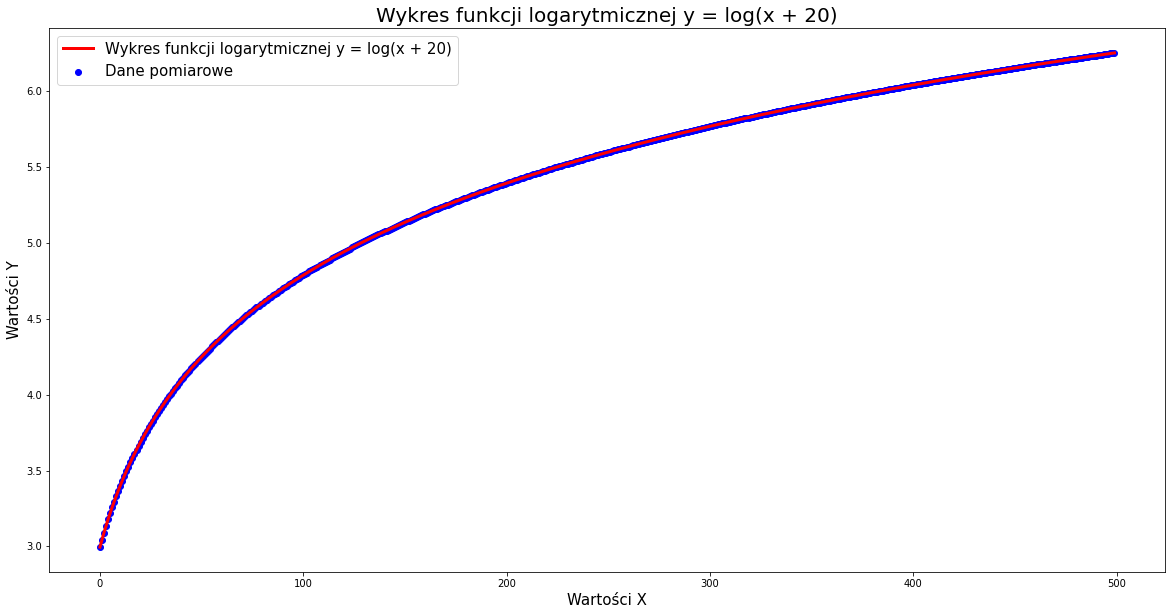

In [ ]:
x = np.array(range(0, 500, 1))
a = 1
b = 20
y = np.log(a*x+b)

plt.figure(figsize=(20,10))
plt.plot(x, y, color = "r", linewidth = 3, label= "Wykres funkcji logarytmicznej y = log(x + 20)")
plt.scatter(x,y, color= "b", label= "Dane pomiarowe")
plt.xlabel("Wartości X", fontsize=15.0)
plt.ylabel("Wartości Y", fontsize=15.0)
plt.title("Wykres funkcji logarytmicznej y = log(x + 20)", fontsize=20.0)
plt.legend(fontsize=15.0)

plt.show()

In [ ]:
x = np.array(range(0, 500, 1))
a = 1
b = 20
def func(x, a, b):
      return np.log(a*x + b)
    
y = func(x, a, b)

j = 0
j_list = []

a1_list = []
b1_list = []

a1_mean = []
b1_mean = []

a1_std = []
b1_std = []

r2_list = []
r2_mean = []

for indeks in range(100):
  j_list.append(j)
  for i in range(100):
    noise = np.random.normal(0, j, 500) # zdefiniowanie szumu o rozkładzie normalnym
    y1 = y + noise # dodanie szumu do niezaszumionej prostej 
    popt, pcov = curve_fit(func, x, y1) # dopasowanie krzywej
    a1 = popt[0] # wyznaczenie współczynnika przy x
    b1 = popt[1] # wyznaczenie wyrazu wolnego
    a1_list.append(float(a1))
    b1_list.append(float(b1))
    y2 = func(x, a1, b1)
    r_sq = r2_score(y, y2) # wyznaczenie średnich wartości współczynnika determinacji r kwadrat
    r2_list.append(r_sq)  

    # plt.figure(figsize=(20,10))
    # plt.ylim([0, 10])
    # plt.xlabel("Wartości X", fontsize = 12.0)
    # plt.ylabel("Wartości Y", fontsize = 12.0)
    # plt.text(0, 9, ("Odchylenie standardowe: " + str(round(j, 2))), fontsize=12.0)
    # plt.text(0, 8.5,("Wartość oczekiwana: 0"), fontsize=12.0)
    # plt.text(0, 9.5, ("Równanie funkcji logarytmicznej: y =log("+ str(a1)+ "x + " + str(b1) + ")"), fontsize=12.0)
    
    # plt.scatter(x, y1, color = "blue", label = "Zaszumione dane pomiarowe")
    # plt.plot(x, y2, color = "red", linewidth = 3, label= "Model dopasowanej krzywej")
    # plt.legend(fontsize=12.0, loc=4, prop={'size': 12})
    # plt.title("Model dopasowanej krzywej do danych z Gaussowskim rozkładem szumu dla funkcji logarytmicznej", fontsize=15.0)
    # plt.show()
    # if i < 10:
    #     plt.savefig('images2/OPSI{0}.jpg'.format(i))
    # else:
    #     plt.savefig('images2/OPSI_{0}.jpg'.format(i))
    
  j += 0.01

  mean_a = np.mean(a1_list)
  a1_mean.append(mean_a)

  mean_b = np.mean(b1_list)
  b1_mean.append(mean_b)

  std_a = np.std(a1_list)
  a1_std.append(std_a)

  std_b = np.std(b1_list)  
  b1_std.append(std_b) 

  mean_r2 = np.mean(r2_list)
  r2_mean.append(mean_r2)

**Save charts and create animations**

In [ ]:
folder = '/content/images2'
files = [f"{folder}/{file}" for file in sorted(os.listdir(folder))]
photos = [imageio.imread(file) for file in files]
imageio.mimwrite('/content/images2/log.mkv', photos, fps=4)

**Presentation of charts**

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, a_mean, color="green", label="Średnia wartość parametru a")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość parametru a", fontsize=15.0)
plt.yticks(fontsize=13.0)
#plt.text(0, 1.0005, ("Wartość minimalna średniej parametru a : " + str(min(a1_mean))), fontsize=12.0)
#plt.text(0, 1.00053,("Wartość maksymalna średniej parametru a : " + str(max(a1_mean))), fontsize=12.0)
plt.title("Wykres zależności odchylenia standardowego szumu i średniej wartości parametru a", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, b1_mean, color="blue", label="Średnia wartość parametru b")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość parametru b", fontsize=15.0)
plt.yticks(fontsize=13.0)
#plt.text(0, 20.08,("Wartość minimalna średniej parametru b : " + str(min(b1_mean))), fontsize=12.0)
#plt.text(0,20.09,("Wartość maksymalna średniej parametru b : " + str(max(b1_mean))), fontsize=12.0)
plt.title("Wykres zależności odchylenia standardowego szumu i średniej wartości parametru b", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, a1_std, color="red", label="Odchylenie standardowe parametru a")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Odchylenie standardowe parametru a", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu i odchylenia standardowego parametru a", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, b1_std, color="purple", label="Odchylenie standardowe parametru b")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Odchylenie standardowe parametru b", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu i odchylenia standardowego parametru b", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, r2_mean, color="cyan", label="Średnia wartość współczynnika determinacji r kwadrat")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość współczynnika determinacji r kwadrat", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu i średniej wartości współczynnika determinacji r kwadrat", fontsize=15.0)
plt.legend(fontsize=15.0)
plt.savefig("r2_mean.jpg")
plt.show()

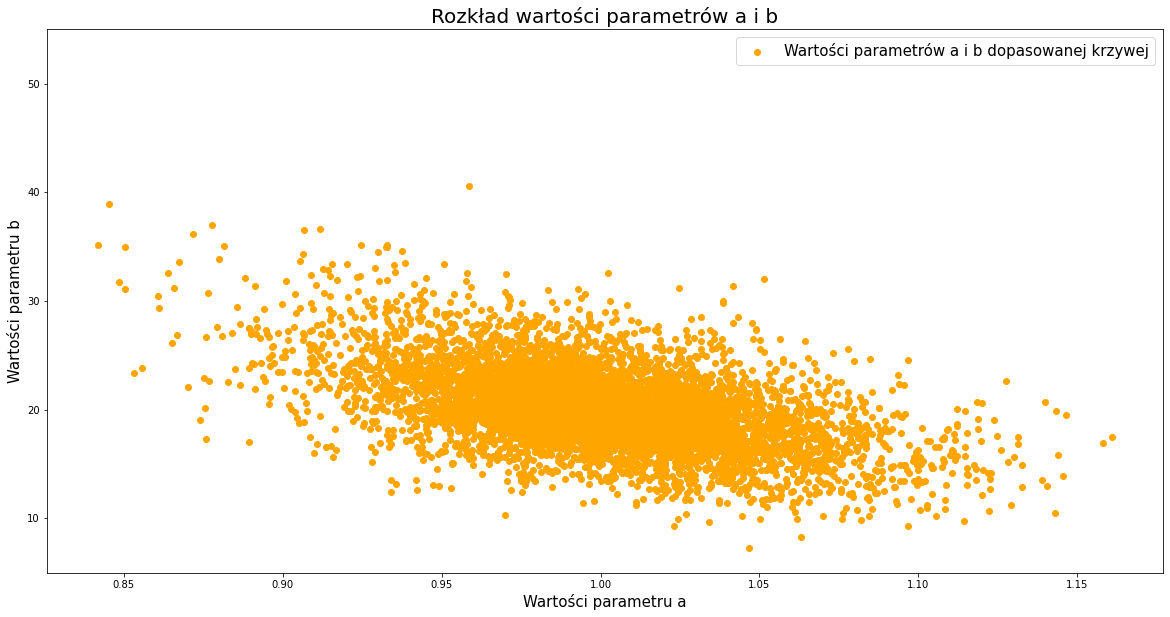

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(a_list, b_list, label = "Wartości parametrów a i b dopasowanej krzywej", color="orange")
#plt.text(0.76, 53,("Wartość maksymalna parametru a : " + str(max(a_list))), fontsize=12.0)
#plt.text(0.76,51,("Wartość minimalna parametru a : " + str(min(a_list))), fontsize=12.0)
#plt.text(0.76,49,("Wartość maksymalna parametru b : " + str(max(b_list))), fontsize=12.0)
#plt.text(0.76,47,("Wartość minimalna parametru b : " + str(min(b_list))), fontsize=12.0)
plt.ylim([5,55])
plt.xlabel("Wartości parametru a", fontsize = 15.0)
plt.ylabel("Wartości parametru b", fontsize = 15.0)
plt.title("Rozkład wartości parametrów a i b", fontsize = 20.0)
plt.legend(loc=1, fontsize=15.0)

In [ ]:
%reset

## **5.Regression for exponent-transformed logarithmic function**


In [ ]:
x = np.array(range(0, 500, 1))
x.sort()
a = 1
b = 20
y = np.log(a*x+b)
plt.figure(figsize=(20,10))
plt.plot(x, y, color = "r", linewidth = 3, label= "Funkcja logarytmiczna y = log(x + 20)")
plt.scatter(x, y, color= "b", label= "Dane pomiarowe")
plt.xlabel("Wartości X", fontsize=15.0)
plt.ylabel("Wartości Y", fontsize=15.0)
plt.title("Wykres funkcji logarytmicznej y = log(x + 20)", fontsize=20.0)
plt.legend(fontsize=15.0)

plt.show()


In [ ]:
x = np.array(range(0, 500, 1))
x.sort()
a = 1
b = 20
y = np.log(a*x+b)
y1 = np.exp(y) #ax+b
plt.figure(figsize=(20,10))
plt.plot(x, y1, color = "r", linewidth = 3, label= "Prosta będąca funkcją logarytmiczną przekształconą eksponentą y = $e^{log(x + 20)}$")
plt.scatter(x, y1, color= "b", label= "Dane pomiarowe")
plt.xlabel("Wartości X", fontsize=15.0)
plt.ylabel("Wartości Y", fontsize=15.0)
plt.title("Wykres funkcji logarytmicznej przekształconej eksponentą y = $e^{log(x + 20)}$", fontsize=20.0)
plt.legend(fontsize=15.0)

plt.show()


In [ ]:
x = np.array(range(0, 500, 1))
x = x.reshape(-1,1)

a = 1
b = 20

y = np.log(a*x + b)
y1 = np.exp(y)

j = 0
j_list = []

a1_list = []
b1_list = []

a1_mean = []
b1_mean = []

a1_std = []
b1_std = []

r2_list = []
r2_mean = []

for indeks in range(100):
  j_list.append(j)
  for i in range(100):
    noise = np.random.normal(0, j, 500) # zdefiniowanie szumu o rozkładzie normalnym
    noise2 = noise.reshape(500,1)
    y2 = np.exp(y+noise2) # dodanie szumu do niezaszumionej prostej, następnie przekształcenie eksponentą
    model = LinearRegression().fit(x, y2) # zdefiniowanie i dopasowanie modelu regresji liniowej 
    a1 = model.coef_ # wyznaczenie współczynnika przy x
    b1 = model.intercept_ # wyznaczenie wyrazu wolnego
    a1_list.append(float(a1[0]))
    b1_list.append(float(b1[0]))
    y3 = a1*x + b1
    r_sq = r2_score(y1, y3) # wyznaczenie średnich wartości współczynnika determinacji r kwadrat
    r2_list.append(r_sq)
   
    # plt.figure(figsize=(20,10))
    # plt.xlim([-30,510])
    # plt.ylim([-400, 3500])
    # plt.xlabel("Wartości X", fontsize = 15.0)
    # plt.ylabel("Wartości Y", fontsize = 15.0)
    # plt.text(-20,2900,("Odchylenie standardowe: " + str(round(j, 2))), fontsize=15.0)
    # plt.text(-20,2700,("Wartość oczekiwana: 0"), fontsize=15.0)
    # plt.text(-20,3300, ("Równanie prostej regresji: y = (" + str(a1[0][0]) + ")x + " + str(b1[0])), fontsize=15.0)
    # plt.text(-20,3100, ("Współczynnik determinacji r kwadrat: " + str(r_sq)), fontsize=15.0)
    # plt.scatter(x, y2, color = "blue", label = "Zaszumione dane pomiarowe")
    # plt.plot(x, y3, color = "red", linewidth = 3, label= "Regresja liniowa")
    # plt.legend(fontsize=15.0, loc=4, prop={'size': 15})
    # plt.title("Model regresji liniowej z Gaussowskim rozkładem szumu", fontsize=20.0)

    # if i < 10:
    #   plt.savefig('images4/OPSI{0}.jpg'.format(i))
    # else:
    #   plt.savefig('images4/OPSI_{0}.jpg'.format(i))
    # plt.show()
   
  j += 0.01
    
  mean_a = np.mean(a1_list)
  a1_mean.append(mean_a)

  mean_b = np.mean(b1_list)
  b1_mean.append(mean_b)

  std_a = np.std(a1_list)
  a1_std.append(std_a)

  std_b = np.std(b1_list)  
  b1_std.append(std_b) 
  
  mean_r2 = np.mean(r2_list)
  r2_mean.append(mean_r2)

 **Save charts and create animations**

In [ ]:
folder = '/content/images4'
files = [f"{folder}/{file}" for file in sorted(os.listdir(folder))]
photos = [imageio.imread(file) for file in files]
imageio.mimwrite('/content/images4/regression_log_exp_01.mkv', photos, fps=4)

**Presentation of charts**

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, a1_mean, color="green", label="Średnia wartość parametru a")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość parametru a", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.text(0,1.165,("Wartość minimalna średniej parametru a : " + str(min(a1_mean))), fontsize=12.0)
plt.text(0,1.175,("Wartość maksymalna średniej parametru a : " + str(max(a1_mean))), fontsize=12.0)
plt.title("Wykres zależności odchylenia standardowego szumu i średniej wartości parametru a", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, b1_mean, color="blue", label="Średnia wartość parametru b")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość parametru b", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.text(0,23.3,("Wartość minimalna średniej parametru b : " + str(min(b1_mean))), fontsize=12.0)
plt.text(0,23.5,("Wartość maksymalna średniej parametru b : " + str(max(b1_mean))), fontsize=12.0)
plt.title("Wykres zależności odchylenia standardowego szumu i średniej wartości parametru b", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, a1_std, color="red", label="Odchylenie standardowe parametru a")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Odchylenie standardowe parametru a", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu i odchylenia standardowego parametru a", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, b1_std, color="purple", label="Odchylenie standardowe parametru b")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Odchylenie standardowe parametru b", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu i odchylenia standardowego parametru b", fontsize=20.0)
plt.legend(fontsize=15.0)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(j_list, r2_mean, color="cyan", label="Średnia wartość współczynnika determinacji r kwadrat")
plt.xlabel("Odchylenie standardowe szumu", fontsize=15.0)
plt.xticks(fontsize=13.0)
plt.ylabel("Średnia wartość współczynnika determinacji r kwadrat", fontsize=15.0)
plt.yticks(fontsize=13.0)
plt.title("Wykres zależności odchylenia standardowego szumu i średniej wartości współczynnika determinacji r kwadrat", fontsize=15.0)
plt.legend(fontsize=15.0)
plt.savefig("r2_mean.jpg")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(a1_list, b1_list, label = "Wartości parametrów modelu regresji", color="orange")
#plt.text(2.1, 125,("Wartość maksymalna parametru a : " + str(max(a1_list))), fontsize=12.0)
#plt.text(2.1,110,("Wartość minimalna parametru a : " + str(min(a1_list))), fontsize=12.0)
#plt.text(2.1,95,("Wartość maksymalna parametru b : " + str(max(b1_list))), fontsize=12.0)
#plt.text(2.1,80,("Wartość minimalna parametru b : " + str(min(b1_list))), fontsize=12.0)
plt.xlabel("Wartości parametru a", fontsize = 15.0)
plt.ylabel("Wartości parametru b", fontsize = 15.0)
plt.title("Rozkład wartości parametrów a i b", fontsize = 20.0)
plt.legend(loc=1, fontsize=15.0)

In [ ]:
%reset